In [48]:
import subprocess
import timeit
import functools
import numpy as np
import matplotlib.pyplot as plt
import time as t

niterations = 2
timeoutvalue = 240

In [2]:
def send_mc_command_classical(formula, trfile):
    aux = lambda x: subprocess.check_output(x, shell = True)
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2".format(j=formula, i=trfile)
    try:
        time = timeit.timeit(
                   functools.partial(aux, command),
                   number = niterations
       )
        return time/niterations
    except Exception as e:
        print(e)
        return timeoutvalue #this corresponds to the timeout value
    
def send_mc_command_bounded(formula, trfile):
    aux = lambda x: subprocess.check_output(x, shell = True)
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2 -bounded 15".format(j=formula, i=trfile)
    try:
        time = timeit.timeit(
                   functools.partial(aux, command),
                   number = niterations
       )
        return time/niterations
    except Exception as e:
        print(e)
        return timeoutvalue #this corresponds to the timeout value

def get_times_classical_approach(formulas, systems):
    values = np.zeros((len(formulas), len(systems)))
    timeouts = np.zeros((len(formulas), len(systems)))
    for fList in zip(formulas, range(len(formulas))):
        for tList in zip(systems, range(len(systems))):
            times = []
            for f in fList[0]:
                for t in tList[0]:
                    times.append(send_mc_command_classical(f, t))
            mean_times, tms = mean_with_timeout_checker(times)
            values[fList[1], tList[1]] = mean_times
            timeouts[fList[1], tList[1]] = tms
    return values, timeouts

def get_times_bounded(formulas, systems):
    values = np.zeros((len(formulas), len(systems)))
    timeouts = np.zeros((len(formulas), len(systems)))
    for fList in zip(formulas, range(len(formulas))):
        for tList in zip(systems, range(len(systems))):
            times = []
            for f in fList[0]:
                for t in tList[0]:
                    times.append(send_mc_command_bounded(f, t))
            mean_times, tms = mean_with_timeout_checker(times)
            values[fList[1], tList[1]] = mean_times
            timeouts[fList[1], tList[1]] = tms
    return values, timeouts

def mean_with_timeout_checker(value_list):
    new_value_list = list(filter(lambda x: x!=timeoutvalue, value_list))
    timeouts = len(list(filter(lambda x: x==timeoutvalue, value_list)))
    if new_value_list:
        return sum(new_value_list) / len(new_value_list), timeouts
    else:
        return timeoutvalue, timeouts



In [3]:
formulasWithLength2 = ["@_1((p1)=>(p2))", "@_1(c_2(q1))", "@_1(X(p1))", "@_1(G(p1))"]

formulasWithLength3 = ["@_1((X(p1))=>(p2))", "@_1((c_2(q1))=>(p1))", "@_1(c_2(G(q1)))", "(@_1(p1))=>(@_2(q1))"]

formulasWithLength4 = ["@_1((c_2(q1))=>(~(p1)))", "@_1((c_2(q1))=>(X(p1)))", "(@_1(p1))=>(@_2(~(q1)))", "@_1(c_2(~(G(q1))))"]

formulasWithLength5 = ["@_1((G(p1))=>((c_2(q1))=>(p2)))", "(@_1((p1)=>(G(p2))))=>(@_2(q1))",
                       "@_1((~(p1))=>(c_2(G(q1))))", "@_1((X(p1))=>(c_2(~(q1))))"]

formulasWithLength6 = ["@_1((X(X(p1)))=>(c_2(G(q1))))", "@_1((X(G(G(p1))))=>(c_2(q2)))"
                      ,"(@_1((G(p1))=>(X(p2))))=>(@_2(q_2))", "(@_1(G(~(p1))))=>(@_2(G(q2)))"]

formulasWithLength7 = ["@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))", "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))",
                       "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))", "(@_2(c_1(G(~(p2)))))=>(@_2(X(q1)))"]

formulasWithLength8 = ["@_1(((G(~(p1)))=>(~(p2)))=>(X(G(p2))))", "@_2((X(G(~(q1))))=>(c_1((X(p1))=>(p2))))",
                       "(@_1(~(G(X(p2)))))=>(@_2(G(~(q1))))", "(@_2(c_1(G(~(p2)))))=>(@_2(~(X(q1))))"]

formulasWithLength9 = ["@_1(((G(~(p1)))=>(p2))=>(X(G((p2)=>(X(p1))))))", "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))",
                       "(@_1(~(G(X(p2)))))=>(@_2(~(G(~(q1)))))", "(@_2(c_1(~(G(~(p2))))))=>(@_2(X(~(q1))))"]

formulasWithLength10 = ["@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))", "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))",
                       "(@_1(~(G(X(~(p2))))))=>(@_2(~(G(~(q1)))))", "(@_2(c_1(~(G(~(p2))))))=>(@_2(G(X(~(q1)))))"]

# Reverse this to have smaller formulas on bottom
allFormulas = list(reversed([formulasWithLength2, formulasWithLength3, formulasWithLength4, formulasWithLength5,
                             formulasWithLength6, formulasWithLength7, formulasWithLength8, formulasWithLength9,
                             formulasWithLength10]))


pathsSize8 = ["../dtl-model-checking/ExampleFiles/t8States1",
              "../dtl-model-checking/ExampleFiles/t8States2",
              "../dtl-model-checking/ExampleFiles/t8States3",
              "../dtl-model-checking/ExampleFiles/t8States4"]

pathsSize16 = ["../dtl-model-checking/ExampleFiles/t16States1",
               "../dtl-model-checking/ExampleFiles/t16States2",
               "../dtl-model-checking/ExampleFiles/t16States3",
               "../dtl-model-checking/ExampleFiles/t16States4"]

pathsSize32 = ["../dtl-model-checking/ExampleFiles/t32States1",
               "../dtl-model-checking/ExampleFiles/t32States2",
               "../dtl-model-checking/ExampleFiles/t32States3",
               "../dtl-model-checking/ExampleFiles/t32States4"]

pathsSize64 = ["../dtl-model-checking/ExampleFiles/t64States1",
               "../dtl-model-checking/ExampleFiles/t64States2"]

pathsSize128 = ["../dtl-model-checking/ExampleFiles/t128States1",
                "../dtl-model-checking/ExampleFiles/t128States2"]

pathsSize256 = ["../dtl-model-checking/ExampleFiles/t256States1",
                "../dtl-model-checking/ExampleFiles/t256States2"]

pathsSize512 = ["../dtl-model-checking/ExampleFiles/t512States1",
                "../dtl-model-checking/ExampleFiles/t512States2"]

pathsSize1024 = ["../dtl-model-checking/ExampleFiles/t1024States1",
                 "../dtl-model-checking/ExampleFiles/t1024States2"]

allDTSs = [pathsSize8, pathsSize16, pathsSize32, pathsSize64, pathsSize128, pathsSize256, pathsSize512, pathsSize1024]


In [4]:
timesA, time_outsA = get_times_classical_approach(allFormulas, allDTSs)
# saving the computation times
np.savetxt('timesA.csv', timesA, delimiter=',')
np.savetxt('timeoutsA.csv', time_outsA, delimiter=',')
print(timesA)
print(time_outsA)

print("\n\nAUTOMATA DONE.\nDOING FOR BMC...")

timesB, time_outsB = get_times_bounded(allFormulas, allDTSs)
# saving the computation times
np.savetxt('timesB.csv', timesB, delimiter=',')
np.savetxt('timeoutsB.csv', time_outsB, delimiter=',')
print(timesB)
print(time_outsB)

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States2 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States3 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States4 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-ex

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States1 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States1 "(@_1(~(G(X(~(p2))))))=>(@_2(~(G(~(q1)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States2 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States3 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States4 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States1 "(@_2(c_1(~(G(~(p2))))))=>(@_2(X(~(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-mode

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "@_1(((G(~(p1)))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States2 "@_1(((G(~(p1)))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States2 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "(@_1(~(G(X(p2)))))=>(@_2(~(G(~(q1)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ..

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_1(((G(~(p1)))=>(~(p2)))=>(X(G(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@_2((X(G(~(q1))))=>(c_1((X(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "@_2((X(G(~(q1))))=>(c_1((X(p1))=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "(@_1(~(G(X(p2)))))=>(@_2(G(~(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States2 "(@_1(~(G(X(p2)))))=>(@_2(G(~(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleF

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States1 "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States1 "(@_2(c_1(G(~(p2)))))=>(@_2(X(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t128States2 "(@_2(c_1(G(~(p2)))))=>(@_2(X(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t256States1 "@

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States3 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States4 "@_1((X(X(p1)))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States1 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "@_1((X(G(G(p1))))=>(c_2(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States3 "@_1((X(G(G(p1))))=>(c_2(q2)))" 

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1((G(p1))=>(X(p2))))=>(@_2(q_2))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1(G(~(p1))))=>(@_2(G(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1(G(~(p1))))=>(@_2(G(q2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States1 "@_1((G(p1))=>((c_2(q1))=>(p2))" 2' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States2 "@_1((G(p1))=>((c_2(q1))=>(p2))" 2' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t8States3 "@_1((G(p1))=>((c_2(q1))=

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1((G(p1))=>((c_2(q1))=>(p2))" 2' returned non-zero exit status 1.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((~(p1))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1((~(p1))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((X(p1))=>(c_2(~(q1

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "@_1((c_2(q1))=>(p1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States2 "@_1((c_2(q1))=>(p1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "@_1(c_2(G(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States2 "@_1(c_2(G(q1)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States1 "(@_1(p1))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t512States2 "(@_1(p1))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 24

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1(~(G(X(~(p2))))))=>(@_2(~(G(~(q1)))))" 2 -bounded 15' returned non-z

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_2((X(G(~(q1))))=>(c_1((p1)=>(p2))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1(~(G(X(p2)))))=>(@_2(G(q1)))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-check

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((~(p1))=>(c_2(G(q1))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1((~(p1))=>(c_2(G(q1))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((X(p1))=>(c_2(~(q1))))" 2 -bounded 15' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-

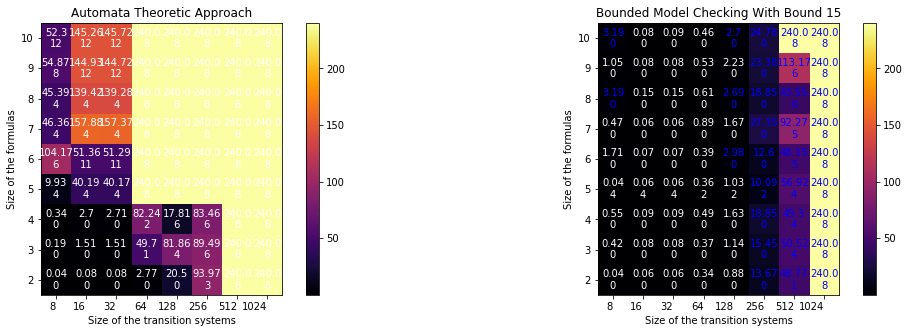

In [6]:
sizeOfFormulas = list(reversed(['2', '3', '4', '5', '6', '7', '8', '9', '10']))
sizeOfTransitionSystems = ['8', '16', '32', '64', '128', '256', '512', '1024']

# quick example instances
times = np.array([[ 0.37484048,  3.52231947,  3.38275967, 24.01992316],
                  [ 0.22080506,  2.2404991 ,  1.97254386, 22.97497471],
                  [ 0.06844611,  0.08082539,  0.08530775,  3.47099287]])

timeouts = np.array([[0., 0., 0., 4.],
                     [0., 0., 0., 2.],
                     [0., 0., 0., 0.]])


text_colors = ['w', 'b']
thresholdA = 3
thresholdB = 0.01

fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(18.3, 5, forward=True)
ax1.set_title('Automata Theoretic Approach')
ax2.set_title('Bounded Model Checking With Bound 15')
ax1.set_xlabel('Size of the transition systems')
ax1.set_ylabel('Size of the formulas')
ax2.set_xlabel('Size of the transition systems')
ax2.set_ylabel('Size of the formulas')


# Plotting the times for the Automata Theoretic Approach

im1 = ax1.imshow(timesA, cmap=plt.cm.inferno)

# We want to show all ticks...
ax1.set_xticks(np.arange(len(sizeOfTransitionSystems)))
ax1.set_yticks(np.arange(len(sizeOfFormulas)))
# ... and label them with the respective list entries
ax1.set_xticklabels(sizeOfTransitionSystems)
ax1.set_yticklabels(sizeOfFormulas)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(sizeOfFormulas)):
    for j in range(len(sizeOfTransitionSystems)):
        text = ax1.text(j, i, str(round(timesA[i, j], 2)) +"\n" + str(int(time_outsA[i, j])),
                       ha="center", va="center", color=text_colors[int(im1.norm(timesA[i, j]) > thresholdA)])
        

# Plotting the times for the bounded model checking 
im2 = ax2.imshow(timesB, cmap=plt.cm.inferno)

# We want to show all ticks...
ax2.set_xticks(np.arange(len(sizeOfTransitionSystems)))
ax2.set_yticks(np.arange(len(sizeOfFormulas)))
# ... and label them with the respective list entries
ax2.set_xticklabels(sizeOfTransitionSystems)
ax2.set_yticklabels(sizeOfFormulas)

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(sizeOfFormulas)):
    for j in range(len(sizeOfTransitionSystems)):
        text = ax2.text(j, i, str(round(timesB[i, j], 2)) +"\n" + str(int(time_outsB[i, j])),
                       ha="center", va="center", color=text_colors[int(im2.norm(timesB[i, j]) > thresholdB)])
        

# adding a color bar
#cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.7])
cbarA = fig.colorbar(im1, ax = ax1)
cbarB = fig.colorbar(im2, ax = ax2)
plt.show()

In [3]:
def parse_result_command_classical(formula, trfile):
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2".format(j=formula, i=trfile)
    try:
        return subprocess.check_output(command, shell = True)
    except:
        return "exception"

def parse_result_command_bmc(formula, trfile):
    command = "gtimeout " + str(timeoutvalue) + " dtl-model-checking-exe -modelCheck {i} \"{j}\" 2 -bounded 15".format(j=formula, i=trfile)
    try:
        return subprocess.check_output(command, shell = True)
    except:
        return "exception"
    

In [ ]:
# This cell counts the times where the bounded model checking algorithm fails
for fList in reversed(allFormulas):
    for tList in allDTSs:
        for f in fList:
            for t in tList:
                print(f)
                print(t)
                result = parse_result_command_classical(f, t)
                if parse_result_command_classical(f, t) != "exception":
                    if parse_result_command_bmc(f, t) == result:
                        print("......OK.......")
                    else: 
                        print(".....FAILED.....")
                else:
                    print("Automata timed out")

This part exists because at first there was a `no parse error` in one of the formulas of level 5. Therefore the tests for formulas of size 5 were made again and saved to a new file

In [15]:
timesASize5, time_outsASize5 = get_times_classical_approach([formulasWithLength5], allDTSs)
# saving the computation times
np.savetxt('timesASize5.csv', timesASize5, delimiter=',')
np.savetxt('timeoutsASize5.csv', time_outsASize5, delimiter=',')
print(timesASize5)
print(time_outsASize5)

print("\n\nAUTOMATA DONE.\nDOING FOR BMC...")

timesBSize5, time_outsBSize5 = get_times_bounded([formulasWithLength5], allDTSs)
# saving the computation times
np.savetxt('timesBSize5.csv', timesBSize5, delimiter=',')
np.savetxt('timeoutsBSize5.csv', time_outsBSize5, delimiter=',')
print(timesBSize5)
print(time_outsBSize5)

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States1 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States2 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States3 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t16States4 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States1 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "@_1((G(p1))=>((c_2(q1

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1((G(p1))=>((c_2(q1))=>(p2)))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "(@_1((p1)=>(G(p2))))=>(@_2(q1))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States1 "@_1((~(p1))=>(c_2(G(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t1024States2 "@_1((~(p1))=>(

This part exists because there was an error with transition systems of size 32. These systems were in fact systems of size 16.

In [4]:
timesASize32, time_outsASize32 = get_times_classical_approach(allFormulas, [pathsSize32])
#saving the computaion times
np.savetxt('timesASize32.csv', timesASize32, delimiter=',')
np.savetxt('timeoutsASize32.csv', time_outsASize32, delimiter=',')
print(timesASize32)
print(time_outsASize32)

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States1 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States3 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States4 "@_1(((~(G(~(p1))))=>(p2))=>(X(G((p2)=>(X(p1))))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States1 "@_2((X(~(G(~(q1)))))=>(c_1((~(p1))=>(~(p2)))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checki

Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "(@_2(c_1(G(~(p2)))))=>(@_2(~(X(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States3 "(@_2(c_1(G(~(p2)))))=>(@_2(~(X(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States4 "(@_2(c_1(G(~(p2)))))=>(@_2(~(X(q1))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States1 "@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32States2 "@_1(((G(~(p1)))=>(p2))=>(X(G(p2))))" 2' returned non-zero exit status 124.
Command 'gtimeout 240 dtl-model-checking-exe -modelCheck ../dtl-model-checking/ExampleFiles/t32Stat

In [6]:
timesBSize32, time_outsBSize32 = get_times_bounded(allFormulas, [pathsSize32])
#saving the computaion times
np.savetxt('timesBSize32.csv', timesBSize32, delimiter=',')
np.savetxt('timeoutsBSize32.csv', time_outsBSize32, delimiter=',')
print(timesBSize32)
print(time_outsBSize32)

[[0.15758147]
 [0.13672743]
 [0.1219009 ]
 [0.11435693]
 [0.09763876]
 [0.10435643]
 [0.12829265]
 [0.12324083]
 [0.08050541]]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


Here we fix the previous mistake by creating an new array and replacing the column for systems of size 32 and the row for formulas of size 4

In [49]:
timesBSize32Correction = np.loadtxt('timesBSize32.csv', delimiter=',')
timesBSize5Correction = np.loadtxt('timesBSize5.csv', delimiter=',')


originalTimesB = np.loadtxt('timesB.csv', delimiter=',')
newtimesB = originalTimesB
newtimesB[:,2] = timesBSize32Correction
newtimesB[5] = timesBSize5Correction


# Corrections for the automata theoretic approach
timesASize32Correction = np.loadtxt('timesASize32.csv', delimiter=',')
timesASize5Correction = np.loadtxt('timesASize5.csv', delimiter=',')


originalTimesA = np.loadtxt('timesA.csv', delimiter=',')
newtimesA = originalTimesA
newtimesA[:,2] = timesASize32Correction
newtimesA[5] = timesASize5Correction



# Correcting the timeouts
timeoutsBSize32Correction = np.loadtxt('timeoutsBSize32.csv', delimiter=',')
timeoutsBSize5Correction = np.loadtxt('timeoutsBSize5.csv', delimiter=',')


originalTimeoutsB = np.loadtxt('timeoutsB.csv', delimiter=',')
newtimeoutsB = originalTimeoutsB
newtimeoutsB[:,2] = timeoutsBSize32Correction
newtimeoutsB[5] = timeoutsBSize5Correction


# For the automata theoretic approach
timeoutsASize32Correction = np.loadtxt('timeoutsASize32.csv', delimiter=',')
timeoutsASize5Correction = np.loadtxt('timeoutsASize5.csv', delimiter=',')


originalTimeoutsA = np.loadtxt('timeoutsA.csv', delimiter=',')
newtimeoutsA = originalTimeoutsA
newtimeoutsA[:,2] = timeoutsASize32Correction
newtimeoutsA[5] = timeoutsASize5Correction


# Saving the corrected times
t = t.time()
np.savetxt('timesB{}.csv'.format(t), newtimesB, delimiter=',')
np.savetxt('timesA{}.csv'.format(t), newtimesA, delimiter=',')
np.savetxt('timesoutsB{}.csv'.format(t), newtimeoutsB, delimiter=',')
np.savetxt('timesoutsA{}.csv'.format(t), newtimeoutsA, delimiter=',')